## Classifier to perform sentiment analysis on movie reviews

In [1]:
from keras import layers
from keras.datasets import imdb
from keras import optimizers
from keras import losses

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Using TensorFlow backend.


In [2]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=12000)

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
for review in train_data[:2]:
    print('Reviews:', review)

Reviews: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Reviews: [1, 194, 1153, 194, 8255, 78, 228, 5, 

In [6]:
train_label[:2]

array([1, 0])

In [7]:
print(type(train_data))

<class 'numpy.ndarray'>


In [8]:
word_index = imdb.get_word_index()
print(type(word_index))

<class 'dict'>


In [9]:
reverse_word_index = dict([ (value, key) for (key, value) in word_index.items() ])

In [10]:
first_review = ' '.join(reverse_word_index.get(i-3, ',') for i in train_data[0])
print(first_review)

, this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert , is an amazing actor and now the same being director , father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for , and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the , of norman and paul they were just brilliant children are often left out of the , list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done

In [11]:
def one_hot_encoding(data, num_words=12000):
    vectorized_sequence = np.zeros((len(data), num_words))
    
    for row, col in enumerate(data):
        vectorized_sequence[row, col] = 1 # assign 1 whenever there is an integer
    return vectorized_sequence

In [12]:
trainX = one_hot_encoding(train_data)
print(trainX.shape)
testX = one_hot_encoding(test_data)
print(testX.shape)

(25000, 12000)
(25000, 12000)


In [13]:
trainY = train_label.astype('float32')
testY = test_label.astype('float32')

In [14]:
testY[:5]

array([0., 1., 1., 0., 1.], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split
from keras import metrics

In [16]:
train_X, val_X = trainX[:20000], trainX[20000:]
train_Y, val_Y = trainY[:20000], trainY[20000:]

In [17]:
from keras.models import Model, Input
from keras import regularizers

In [18]:
ip = Input(batch_shape=(None, 12000), name='input')
dense1 = layers.Dense(32, activation='relu',
                      kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001),
                      name='dense1')(ip)
dropout1 = layers.Dropout(0.3)(dense1)
dense2 = layers.Dense(32, activation='relu',
                      kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001),
                      name='dense2')(dropout1)
dropout2 = layers.Dropout(0.3)(dense2)
output = layers.Dense(1, activation='sigmoid', name='output')(dropout2)

In [19]:
model = Model(inputs=ip, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 12000)             0         
_________________________________________________________________
dense1 (Dense)               (None, 32)                384032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense2 (Dense)               (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 385,121
Trainable params: 385,121
Non-trainable params: 0
_________________________________________________________________


In [20]:
loss = losses.binary_crossentropy
opt = optimizers.adam(lr=0.001)
accuracy = metrics.binary_accuracy

In [21]:
model.compile(loss=loss, optimizer=opt, metrics=[accuracy])

In [22]:
history = model.fit(train_X, train_Y,
                   epochs = 20,
                   batch_size = 512,
                   verbose = 2,
                   validation_data = (val_X, val_Y)
                   )

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
 - 2s - loss: 1.9776 - binary_accuracy: 0.6770 - val_loss: 0.9216 - val_binary_accuracy: 0.8038
Epoch 2/20
 - 1s - loss: 0.8091 - binary_accuracy: 0.7957 - val_loss: 0.6959 - val_binary_accuracy: 0.8458
Epoch 3/20
 - 1s - loss: 0.7084 - binary_accuracy: 0.8296 - val_loss: 0.6543 - val_binary_accuracy: 0.8508
Epoch 4/20
 - 1s - loss: 0.6750 - binary_accuracy: 0.8437 - val_loss: 0.6306 - val_binary_accuracy: 0.8570
Epoch 5/20
 - 1s - loss: 0.6537 - binary_accuracy: 0.8509 - val_loss: 0.6125 - val_binary_accuracy: 0.8560
Epoch 6/20
 - 1s - loss: 0.6321 - binary_accuracy: 0.8555 - val_loss: 0.5888 - val_binary_accuracy: 0.8652
Epoch 7/20
 - 1s - loss: 0.6125 - binary_accuracy: 0.8610 - val_loss: 0.5849 - val_binary_accuracy: 0.8666
Epoch 8/20
 - 1s - loss: 0.6077 - binary_accuracy: 0.8638 - val_loss: 0.5784 - val_binary_accuracy: 0.8696
Epoch 9/20
 - 1s - loss: 0.5996 - binary_accuracy: 0.8650 - val_loss: 0.5703 - val_binary_accur

In [23]:
print(type(history))

<class 'keras.callbacks.History'>


In [24]:
print(type(history.history))

<class 'dict'>


In [25]:
print(history.history.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


In [26]:
plt.rcParams['figure.figsize'] = 15, 8

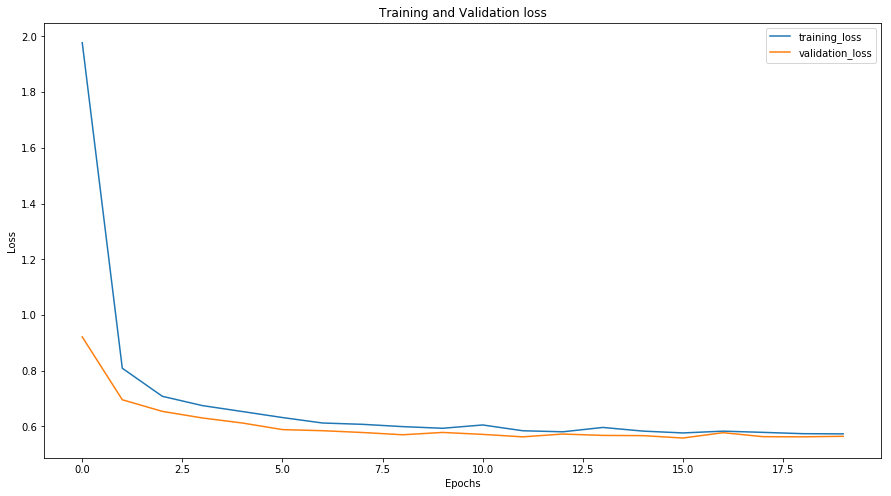

In [27]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

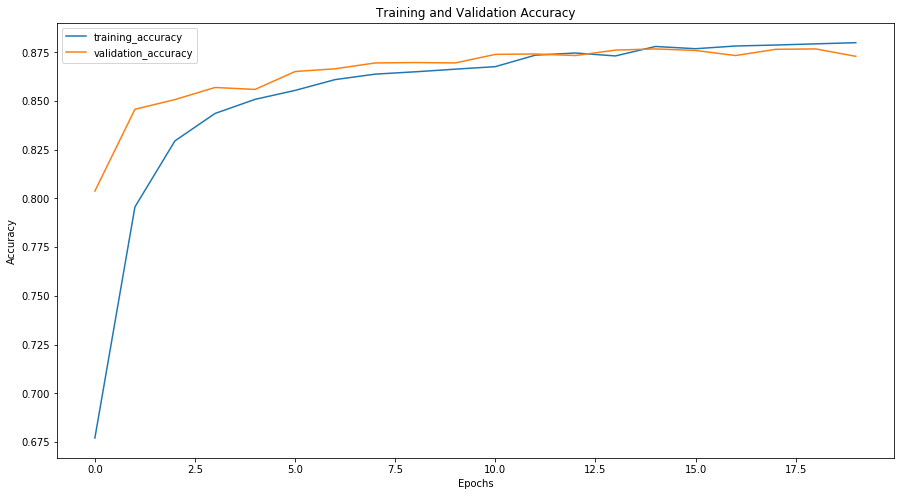

In [28]:
plt.plot(history.history['binary_accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [29]:
test_result = model.evaluate(testX, testY)

25000/25000 [==============================] - 2s 85us/step


In [30]:
print(type(test_result))

<class 'list'>


In [31]:
print(test_result)

[0.5713596053504943, 0.87092]
